## Import libraries

In [1]:
import pandas as pd
import numpy as np

## Load Data

In [2]:
df = pd.read_csv("train_s3TEQDk.csv")
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
df["Is_Lead"].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

### Data is unbalanced
### Lets make the data balanced

In [4]:
from sklearn.utils import resample
train_majority = df[df.Is_Lead==0]
train_minority = df[df.Is_Lead==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=32)
df_balanced = pd.concat([train_minority_upsampled, train_majority])
df_balanced["Is_Lead"].value_counts()

1    187437
0    187437
Name: Is_Lead, dtype: int64

### Now the data is balanced
### Lets check missing values

In [5]:
df_balanced.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         84850
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

### Only one column has missing values
### Lets drop unnessesary columns

In [6]:
df_balanced.drop("ID",axis=1,inplace=True)

### Lets check the datatypes of all columns

In [7]:
df_balanced.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

### Lets convert objects to categories

In [8]:
for label, content in df_balanced.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_balanced[label] = content.astype("category").cat.as_ordered()

In [9]:
df_balanced.dtypes

Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                   int64
dtype: object

### Now the datatypes have changed

### Lets take care of missing values first

In [10]:
df_balanced["Credit_Product_is_missing"] = pd.isnull(df_balanced["Credit_Product"]).astype(int)

In [11]:
df_balanced["Credit_Product"] = pd.Categorical(df_balanced["Credit_Product"]).codes+1

### Lets convert categories to integers

In [12]:
for label, content in df_balanced.items():
    if pd.api.types.is_categorical(content):
        df_balanced[label] = pd.Categorical(content).codes

In [13]:
df_balanced.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_is_missing
45545,0,63,18,1,2,51,2,1499009,0,1,0
178850,1,51,34,2,1,73,2,1427471,0,1,0
39534,0,45,33,0,0,63,2,965685,0,1,0
85301,1,51,33,2,2,116,0,2039666,0,1,1
239193,0,85,33,1,1,73,1,576933,1,1,0


## Now our data is ready to fit the model

### Lets divide data into X and Y

In [14]:
X = df_balanced.drop("Is_Lead",axis=1)
y = df_balanced[["Is_Lead"]]

## Import required libraries

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

## Make the train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

## N-neighbors calculation for KNN

In [17]:
import math
math.sqrt(len(df_balanced))

612.2695484833457

### Assigning models

In [18]:
log_model = LogisticRegression()
knn_model1 = KNeighborsClassifier()
knn_model2 = KNeighborsClassifier(n_neighbors = 611)
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

## Fitting models

In [19]:
log_model.fit(X_train,y_train)
knn_model1.fit(X_train,y_train)
knn_model2.fit(X_train,y_train)
nb_model.fit(X_train,y_train)
dt_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Making predictions

In [20]:
log_pred = log_model.predict(X_test)
knn_pred1 = knn_model1.predict(X_test)
knn_pred2 = knn_model2.predict(X_test)
nb_pred = nb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

### Checking accuracy of each model

In [21]:
for i in [log_pred,
            knn_pred1,
            knn_pred2,
            nb_pred,
            dt_pred,
            rf_pred]:
    print(roc_auc_score(y_test,i))

0.5776045936063487
0.6945690616787259
0.5387843193887532
0.6479451649993265
0.9005264303224502
0.9270100228122836


### Decision tree and Random Forest are best performing models

## Performing Hyperparameter tuning on Random FOrest Classifier

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Instantiate RandomizedSearchCV model
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,random_state=48), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=5,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

## Checking best parameters of the model

In [ ]:
rs_rf.best_params_

## Load Test Data

In [22]:
df_test = pd.read_csv("test_mSzZ8RL.csv")
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


## Saving ID column for further use

In [23]:
ID = df_test["ID"]

## Performing the same operations that earlier performed on train data

In [24]:
df_test.drop("ID",axis=1,inplace=True)
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()
df_test["Credit_Product_is_missing"] = pd.isnull(df_test["Credit_Product"]).astype(int)
df_test["Credit_Product"] = pd.Categorical(df_test["Credit_Product"]).codes+1
for label, content in df_test.items():
    if pd.api.types.is_categorical(content):
        df_test[label] = pd.Categorical(content).codes

### Test data is ready for predictions

In [25]:
df_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Credit_Product_is_missing
0,1,29,4,1,0,25,2,742366,0,0
1,1,43,18,1,1,49,0,925537,0,1
2,1,31,20,2,0,14,1,215949,0,0
3,1,29,22,1,0,33,1,868070,0,0
4,0,29,20,1,0,19,1,657087,0,0


### Lets fit the models with best hyper parameters that we got form hyperparameter tuning

In [26]:
final_model = RandomForestClassifier(n_estimators = 610, min_samples_split = 2, min_samples_leaf = 1, max_depth = None)
final_model.fit(X,y)
final_pred = final_model.predict(df_test)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## Lets make the submission file using the predictions 

In [27]:
sub = pd.DataFrame()
sub["ID"] = ID
sub["Is_Lead"] = final_pred

In [28]:
sub

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0


### Its time to save the submission dataframe as a csv file

In [29]:
sub.to_csv('final_submission.csv',index=False)

## Lets check which are the features contributing the most in our model

In [30]:
final_model.feature_importances_

array([0.01168362, 0.14110093, 0.09613958, 0.02261059, 0.05696821,
       0.14025716, 0.19157774, 0.2283216 , 0.01277044, 0.09857013])

## Lets have a graphical representation

In [31]:
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

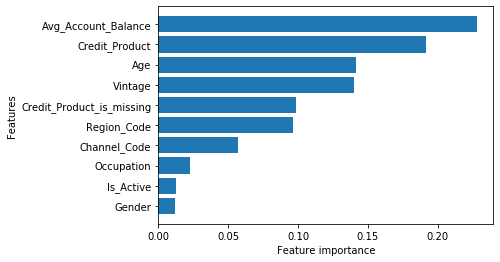

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline
plot_features(X.columns,final_model.feature_importances_)

## I also tried standardizing and normalizing the data but it did not helped much for the accuracy